<a href="https://colab.research.google.com/github/ParasNandwani/MLmodels/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree On Titanic dataset

Table Of Contents:-       
1. Problem Statement.   
2. Data Loading and Description.   
3. PreProcessing.    
4. Decision Tree
  - 4.1 Introduction Of Decision Tree
  - 4.2 Important Terminology related to Decision Trees
  - 4.3 Types Of Decision Trees





### 1. Problem Statement.   
The goal is to **predict survival** of passengers travelling in RMS **Titanic** using **Logistic Regression**

## Data Loading and Description.      
Importing Packages

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from subprocess import check_output


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Preprocessing the data.      
-  Dealing with missing values
    - Dropping/Replacing missing entries of **Embarked**
    - Replacing missing values of **Age** with median values.
    - Dropping the column  **'Cabin'** as it has too many values
    - Replacing 0 values of fare with median values
    

In [0]:
# fillig with mode values
titanic_data.Embarked=titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [0]:
median_age=titanic_data.Age.median()
titanic_data.Age.fillna(median_age,inplace=True)

In [0]:
#  Droping column
titanic_data.drop('Cabin',axis=1,inplace=True)

In [0]:
titanic_data['Fare']=titanic_data.Fare.replace(0,titanic_data['Fare'].median())

## Creating  a new feature named FamilySize

In [0]:
titanic_data['FamilySize']=titanic_data['SibSp']+titanic_data['Parch']+1

In [0]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


## Segmenting Sex column as per Age,Age less than 15 as child ,Age greater than 15 as Males and Females as per their gender 

In [0]:
titanic_data['GenderClass']=titanic_data.apply(lambda x:'child' if x['Age']<15 else x['Sex'],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [0]:
titanic_data[titanic_data['Age']<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


## Dummification of GenderClass & Embarked

In [0]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

In [0]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0


## Dropping Columns 'Name','Ticket','Sex','Sibsp' and 'Parch','PassengerId'

In [0]:
titanic=titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch','PassengerId'],axis=1)

In [0]:
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


## Drawing pair plot to know joint relationship between 'Fare','Age','PClass' adnd 'Survived'

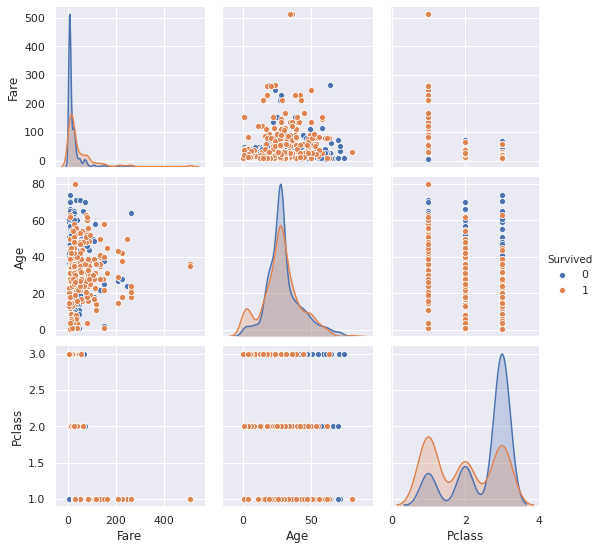

In [0]:
sns.pairplot(titanic[['Fare','Age','Pclass','Survived']],vars=['Fare','Age','Pclass'],hue='Survived')

Establishing  coorelation between all the features using heatmap

Text(0.5, 1.0, 'Correlation between features')

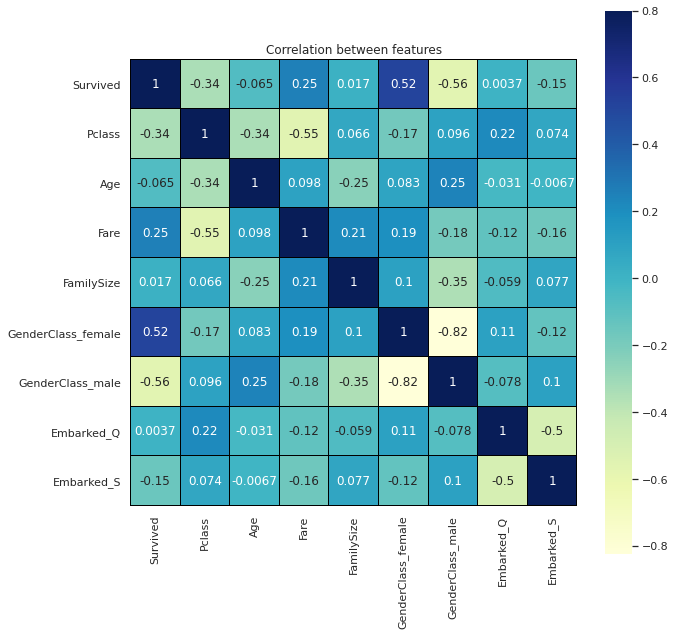

In [0]:
import matplotlib.pyplot as plt
corr=titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=0.1,square=True,annot=True,cmap='YlGnBu',linecolor='black')
plt.title("Correlation between features")

# Decision Tree.      

A decision tree is one of the most widely used superviesd learning algorithm that can perform both **both regression and classification tasks**.    
The intution behind the decision tree algorithm is simple yet powerful.    
- A decision tree splits the data into multiple sets. Then each of these sets is further split into subsets to arrive at decision.
- It is a very natural decision making process asking a series of questions in a nested if then else statement.
- On each node we ask a question to further skip the data held by the node.   
The structure of decision tree resembles an upside down tree. with its root at top and branches at bottom.     
Decision tree is a type of **Supervised Learning Algorithm**(having a pre-defined target variable) that is mostly used in classification problems.    - It works for both **catagorical and continous** input and output variables.    
- In this technique, we split the population or sample into two or more homogeneous sets (or sub populations) based on most signnificant splitter/differentiator in input variables.


## Important terminology related to Decision Trees
- **Root Node**.    
 It represents entire population or sample and this further get divided into two or more homogenous sets.      
- **Splitting**.   
It is process of dividing a node into two or more sub nodes.       
- **Decision Node**.    
When a sub node  further splits into further sub-nodes, then it is called Decision Node.    
- **Leaf/Terminal Node**.     
Nodes do not split is called Leaf Node/terminal Node.
- **Prunning**.   
When we remove sub-nodes of decision node,this process is called Pruning.Opposite process of splitting.
- **Branch / sub-tree**.    
A subsection of entire tree is called as Branch/sub-tree
-  **Parent and Child node**.  
A node which is divided into sub-nodes is called as Parent node of sub nodes where as the sub-nodes are the childof parent node.

# Types of Decision Trees.      
Type of decision tree is based on the type of Target Variable we have.It can be of two types:     
- **Catagorical variable Decision Tree**.      
 -  Decision trees which has catagorical tareget variable is called as Catagorical Variable Decision Tree
- **Continous variable Decision Tree**
 - Decision Tree has continous target variable then it is called as Continous Variable Decision Tree.

# Concept of Homogenity.   
Homogenous population are alike  and Hetereogenous Population are unlike.    
- A Hetereogenous population is one where indviduals are not similar to another.
- For example,we could have a hetereogenous population in terms of humans that have migrated from different regions of the world and living together.That population woykld likely be heterogenous in regards to height,hair texture,diseases immunity and other traits because of the varied background and gentics.   


### How does a tree decide where to split ?
The decision of making strategic split heavily affects a. tree's accuracy.The decision criteria is different for classification and regression trees.Decision tree uses multiple algorithm to decide to split a node into tow or more sub-nodes.The creation of sub-nodes increases the homogenity of resultant sub-nodes .In other words we can say that purity of the node increases 

#Gini Index
Gini index says,if we select two items from a population at random and then they

#Preparing X and Y using pandas


In [0]:
X=titanic.loc[:,titanic.columns != 'Survived']

In [0]:
Y=titanic.Survived

In [0]:
print(X.shape)
print(Y.shape)

(891, 8)
(891,)


# Splitting X and Y into training and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 8)
(712,)
(179, 8)
(179,)


# Decision Tree in scikit learn
To apply an machine learning algorithm on our dataset,basically there are 4 steps:
1. Load the algorithm
2. Instantiate and fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model


from sklearn import tree.  
model= tree.DecisionTreeClassifier(criterion='gini').  
model.fit(x,y).   
predicted= model.prredict(x_test)




In [0]:
  from sklearn import tree
  model= tree.DecisionTreeClassifier(random_state=0,criterion='entropy')# base model
  model.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Plotting Our Model For Decision Tree


In [0]:
from graphviz import Source
graph=Source(tree.export_graphviz(model,out_file=None,filled=True,rounded=True,feature_names=X.columns))
graph.render('dtree_render',view=True)

'dtree_render.pdf'

[Text(139.2392523364486, 212.49818181818182, 'X[5] <= 0.5\nentropy = 0.956\nsamples = 712\nvalue = [443, 269]'),
 Text(61.797196261682245, 202.61454545454546, 'X[0] <= 2.5\nentropy = 0.847\nsamples = 281\nvalue = [77, 204]'),
 Text(26.596261682242993, 192.73090909090908, 'X[2] <= 28.856\nentropy = 0.272\nsamples = 150\nvalue = [7, 143]'),
 Text(20.338317757009346, 182.84727272727272, 'X[2] <= 28.231\nentropy = 0.469\nsamples = 60\nvalue = [6, 54]'),
 Text(17.209345794392526, 172.96363636363637, 'X[1] <= 21.5\nentropy = 0.419\nsamples = 59\nvalue = [5, 54]'),
 Text(14.080373831775702, 163.07999999999998, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(20.338317757009346, 163.07999999999998, 'X[1] <= 27.5\nentropy = 0.519\nsamples = 43\nvalue = [5, 38]'),
 Text(12.51588785046729, 153.19636363636363, 'X[1] <= 25.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(6.257943925233645, 143.31272727272727, 'X[3] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(3.128971

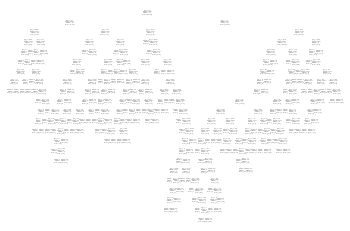

In [0]:
tree.plot_tree(model)

Using the model for prediction


In [0]:
y_pred_train=model.predict(X_train)

In [0]:
y_pred_test=model.predict(X_test)

Now lets see model evaluation techniques


#Model Evaluation
**Error** is the deviation of the values predicted by the model with the true values
We will use accuracy_score and confusion_metrics for evaluation

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for the test data is:',accuracy_score(Y_test,y_pred_test))

Accuracy score for the test data is: 0.7541899441340782


#Model Evaluation using Confusion matrix

A **Confusion Matrics** is a **summary** of prediction results on a classification problem.    
The number of correct and incorrect predictions are summarized with count values and broken down by each class


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(Y_test,y_pred_test))
confusion_matrix.index=['Actual Died','Actual Survived']
confusion_matrix.columns=['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  88                  18
Actual Survived              26                  47


This means 88+47=135 are correct predictions and 26+18=44 incorrect predictions

# Decision Tree With Gridsearch
Applying GridSearch() method for exhaustive search over specified parameter value of estimator.    
Below we will apply GridSearch over the following parameters


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state=0)


tree_para=[{'criterion':['gini','entropy'],
            'max_depth':range(2,60),
            'max_features':['sqrt','log2',None]}]


grid_search=GridSearchCV(decision_tree_classifier,tree_para,cv=10,refit='AUC')
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
             

In [0]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

- Using Model for prediction

In [0]:
y_pred_test1=grid_search.predict(X_test)

- Model Evaluation and Prediction

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy_score',accuracy_score(Y_test,y_pred_test1))

Accuracy_score 0.7877094972067039


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(Y_test,y_pred_test1))
confusion_matrix.index=['Actual Died','Actual Survived']
confusion_matrix.columns=['Predicted Died','Predicted Survived']

print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  98                   8
Actual Survived              30                  43


#Random Forest

In [0]:
from sklearn.ensemble import  RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)
y_pred_test=model.predict(X_test)


print('Accuracy: ',accuracy_score(Y_test,y_pred_test))

from sklearn.metrics import confusion_matrix
confusion_matrix= pd.DataFrame(confusion_matrix(Y_test,y_pred_test))
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

Accuracy:  0.7877094972067039
                 Predicted Died  Predicted Survived
Actual Died                  95                  11
Actual Survived              27                  46


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV 
dict_param ={
    'max_depth': range(2,20),
    'min_samples_split' :sp_randint(5,25),
    'min_samples_leaf': sp_randint(5,20),
    'bootstrap':[True,False],
    'n_estimators':[20,50,100,400,700,1000,1500],
    'criterion': ['gini','entropy'],
    'max_features':['sqrt','log2',None]
}

#run randomized search

n_iter_search= 10
random_search=RandomizedSearchCV(model, param_distributions= dict_param, n_iter=n_iter_search, n_jobs=-1)
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [0]:
print('best_estmator',random_search.best_estimator_)


best_estmator RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:
y_pred_cv_test=random_search.predict(Y_test)


ValueError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(Y_test,y_pred_cv_test))
confusion_matrix.index=['Actual Died','Actual Survived']
confusion_matrix.columns=['Predicted Died','Predicted Survived']

print(confusion_matrix)

NameError: ignored

In [0]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rd

from sklearn import svm, tree,linear_model,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process

from xgboost import XGBClassifier


## Common Model Helpers
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


##Visualisations
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix


#Importing Models
from sklearn import svm, tree, linear_model,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier ,RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC,LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Import other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,make_scorer
from sklearn.metrics import accuracy_score,recall_score,precision_recall_curve
from sklearn.model_selection import StratifiedKFold , cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

In [0]:
len(Y)

891

In [35]:
data = pd.read_csv("https://raw.githubusercontent.com/Mineria/Titanic/master/csv/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
data['Title']= data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [0]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
data['Title']=data['Title'].map(title_mapping)

In [0]:
data=data.drop(['Name','PassengerId'],axis=1)

In [0]:
data=data.drop(['Ticket','Cabin'],axis=1)


In [0]:
# Change Sex to Numeric
data['Sex']=data.Sex.map({'female':1,'male':0}).astype(int)

In [0]:
data['FamilySize']=data['SibSp']+data['Parch']+1
data['IsAlone']=0
data.loc[data['FamilySize']==1,'IsAlone']=1
data.head()

data=data.drop(['Parch','SibSp','FamilySize'],axis=1)

In [0]:
#Imputing Missing Value
data['Age'].fillna(data['Age'].dropna().mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].dropna().mode()[0],inplace=True)

In [0]:
#Catagorizing Numerical Values
data['FareBand']=pd.qcut(data['Fare'],4).astype(str)
data['AgeBand']=pd.qcut(data['Age'],4).astype(str)

In [16]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [0]:
#Converting Emabark to Number

data['Embarked']=data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [18]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand,AgeBand
0,0,3,0,22.0,7.2500,0,1,0,"(-0.001, 7.91]","(0.419, 22.0]"
1,1,1,1,38.0,71.2833,1,3,0,"(31.0, 512.329]","(35.0, 80.0]"
2,1,3,1,26.0,7.9250,0,2,1,"(7.91, 14.454]","(22.0, 29.699]"
3,1,1,1,35.0,53.1000,0,3,0,"(31.0, 512.329]","(29.699, 35.0]"
4,0,3,0,35.0,8.0500,0,1,1,"(7.91, 14.454]","(29.699, 35.0]"


In [19]:
data['AgeBand'].unique()
data['FareBand'].unique()

array(['(-0.001, 7.91]', '(31.0, 512.329]', '(7.91, 14.454]',
       '(14.454, 31.0]'], dtype=object)

In [20]:
data['FareBand'].isna().sum()

0

In [0]:
data['FareBand'] = data['FareBand'].map( {'(-0.001, 7.91]': 0, '(31.0, 512.329]': 3, '(7.91, 14.454]': 1, '(14.454, 31.0]':2 } ).astype(int)


In [0]:
data['AgeBand'] = data['AgeBand'].map( {'(0.419, 22.0]': 0, '(35.0, 80.0]': 3, '(22.0, 29.699]': 1, '(29.699, 35.0]':2 } ).astype(int)

In [23]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand,AgeBand
0,0,3,0,22.0,7.2500,0,1,0,0,0
1,1,1,1,38.0,71.2833,1,3,0,3,3
2,1,3,1,26.0,7.9250,0,2,1,1,1
3,1,1,1,35.0,53.1000,0,3,0,3,2
4,0,3,0,35.0,8.0500,0,1,1,1,2


In [0]:
dataDump=data.copy()
df=dataDump.drop(['Survived','Age','Fare'],axis=1)

In [25]:
df.head()

,Pclass,Sex,Embarked,Title,IsAlone,FareBand,AgeBand
0,3,0,0,1,0,0,0
1,1,1,1,3,0,3,3
2,3,1,0,2,1,1,1
3,1,1,0,3,0,3,2
4,3,0,0,1,1,1,2


In [26]:
df2=df.drop([],axis=1)
df2.head()

,Pclass,Sex,Embarked,Title,IsAlone,FareBand,AgeBand
0,3,0,0,1,0,0,0
1,1,1,1,3,0,3,3
2,3,1,0,2,1,1,1
3,1,1,0,3,0,3,2
4,3,0,0,1,1,1,2


In [0]:
df3=pd.DataFrame()

In [28]:
for col in df.columns:
  df3[col]=df[col].astype('category')

Target=['Survived']
data1_x_bin=pd.concat([pd.get_dummies(df3),data[['Age','Fare']]],axis=1)
data1_x_bin.drop(columns=['Age','Fare'],inplace=True)
data1_x_bin.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,IsAlone_0,IsAlone_1,FareBand_0,FareBand_1,FareBand_2,FareBand_3,AgeBand_0,AgeBand_1,AgeBand_2,AgeBand_3
0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
MLA=[
    #Ensemble Methods

    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),

    #Gaussian Process
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifier(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),


    #NaivBayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #nearesr neighbour
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees
    tree.DecisionTreeClassifier(),
    # tree.ExtraTreesClassifier(),

    #XGBClassifier
    XGBClassifier()

]

In [0]:
#split dataset in cross validation with spliter class
# Note : this is an alternative to train_test_split
#n_splits = number of re-shuffling & splitting iterations
#
cv_split=model_selection.ShuffleSplit(n_splits=5,test_size=0.3,train_size=.7,random_state=0)
# create table to compare MLA metrics

MLA_COLUMNS=['MLA_NAME','MLA_PARAMETERS','MLA_TRAIN_ACCURACY_MEAN','MLA_TEST_ACCURACY_MEAN','MLA_TEST_ACCURACY 3*STD',
             'MLA_TIME','TRAIN_TEST_DIFFERENCE']

MLA_COMPARE=pd.DataFrame(columns=MLA_COLUMNS)

MLA_PREDICT=data[Target]

#index through MLA and save performance to table
row_index=0
Feature_Importance= {}

for alg in MLA:
  MLA_NAME=alg.__class__.__name__
  MLA_COMPARE.loc[row_index,'MLA_NAME']=MLA_NAME
  MLA_COMPARE.loc[row_index,'MLA_PARAMETERS']=str(alg.get_params())

  #score model with cross validation 
  cv_results=model_selection.cross_validate(alg,data1_x_bin,data[Target],cv=cv_split,return_train_score=True,scoring='precision')
  MLA_COMPARE.loc[row_index,'MLA_TIME']=cv_results['fit_time'].mean()
  MLA_COMPARE.loc[row_index,'MLA_TRAIN_ACCURACY_MEAN']=cv_results['train_score'].mean()
  MLA_COMPARE.loc[row_index,'MLA_TEST_ACCURACY_MEAN']=cv_results['test_score'].mean()
  #if this is non a non-bias random sample ,then +/- 3 standard deviations (std) of mean ,should statisticaly capture 99.7 % of the subsets
  MLA_COMPARE.loc[row_index,'MLA_TEST_ACCURACY 3*STD']=cv_results['test_score'].std()*3 #worst case analysis
  #
  alg.fit(data1_x_bin,data[Target])

  try:
    Feature_Importance[MLA_NAME]=alg.feature_importances_
  except AttributeError:
    pass

  row_index+=1



In [46]:
MLA_COMPARE.head()

,MLA_NAME,MLA_PARAMETERS,MLA_TRAIN_ACCURACY_MEAN,MLA_TEST_ACCURACY_MEAN,MLA_TEST_ACCURACY 3*STD,MLA_TIME,TRAIN_TEST_DIFFERENCE
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.779952,0.731991,0.107221,0.0819399,NaN
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.868355,0.759132,0.17946,0.0220861,NaN
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.912472,0.770043,0.151595,0.122706,NaN
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.879976,0.809277,0.104292,0.101593,NaN
4,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.877815,0.784706,0.0748293,0.230185,NaN


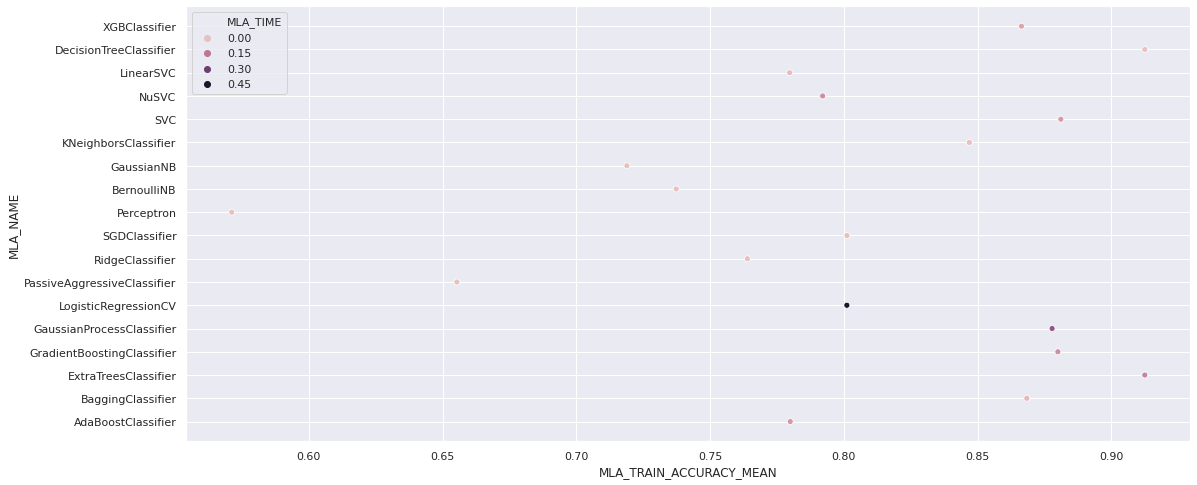

In [49]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap=sns.cubehelix_palette(dark=.1,light=0.8,as_cmap=True)
sns.scatterplot(x='MLA_TRAIN_ACCURACY_MEAN',y='MLA_NAME',data=MLA_COMPARE,hue='MLA_TIME',palette=cmap)



In [52]:
feature_names=data1_x_bin.columns
feature_impt_df=pd.DataFrame.from_dict(Feature_Importance)
feature_impt_df.index=feature_names
feature_impt_df

,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,DecisionTreeClassifier,XGBClassifier
Pclass_1,0.08,0.045282,0.049053,0.037139,0.039658
Pclass_2,0.02,0.038760,0.001944,0.019124,0.005655
Pclass_3,0.02,0.098206,0.140822,0.124279,0.096136
Sex_0,0.10,0.124412,0.152489,0.002199,0.179402
Sex_1,0.10,0.099289,0.019645,0.016599,0.000000
Embarked_0,0.04,0.025867,0.024511,0.017808,0.019500
Embarked_1,0.02,0.021852,0.009115,0.014595,0.014941
Embarked_2,0.02,0.015504,0.013534,0.003799,0.008463
Title_1,0.10,0.177800,0.407615,0.489150,0.429437
Title_2,0.08,0.053038,0.000576,0.007114,0.003405
